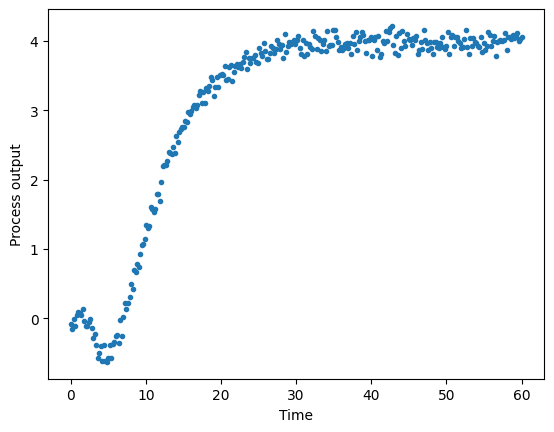

Kp = 3.9921823122061273, taun = -3.1074008004978713, tau1 = 4.749036486974915, tau2 = 3.417381360607285, theta = 2.704134080116417
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.07699639 -0.20557273 -0.31189524 -0.39785041
 -0.46519158 -0.51554762 -0.55043104 -0.57124558 -0.57929336 -0.57578156
 -0.56182871 -0.53847052 -0.50666544 -0.46729979 -0.4211926  -0.36910014
 -0.31172019 -0.24969597 -0.18361988 -0.11403699 -0.04144829  0.03368625
  0.11094484  0.18994117  0.27032196  0.35176456  0.43397484  0.51668507
  0.59965209  0.68265546  0.76549585  0.84799343  0.92998649  1.01133
  1.09189442  1.17156448  1.25023809  1.32782533  1.40424745  1.47943604
  1.55333217  1.6258856   1.6970541   1.76680275  1.83510336  1.90193383
  1.96727767  2.0311235   2.09346452  2.15429818  2.2136257   2.27145177
  2.32778413  2.38263333  2.4360124   2.48793659  2.53842311  2.58749092
  2.63516049

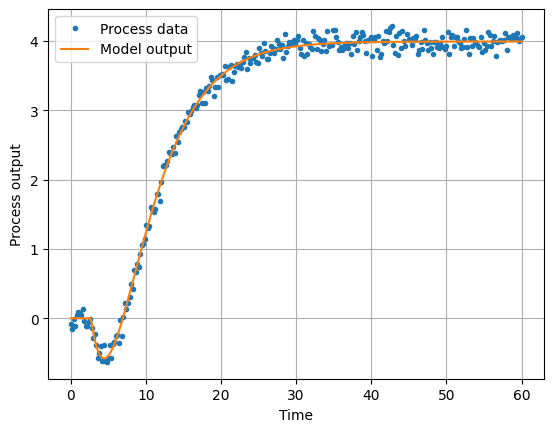

In [1]:
# Identification of inverse response model with time delay from noisy process data
# Seshu Damarla, 29 Nov. 2024
# Reference: Process Control: Modelling, Simulation and Control by B. W. Bequette
# Chemical Process Control An Introduction to Theory and Practice - George Stephanopoulos

"""
Second-order transfer function with time delay:
    G(s) = [Kp*(taun*s+1) / ((tau1 * s + 1) *(tau2 * s + 1))]* e^(-s*Θ)
    t: time
    Kp: system gain
    tau1,tau2,taun: time constants
    Θ: time delay     """

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# define response of the model to a step change in input
def inverse_response_model_with_delay(t,Kp,taun,tau1,tau2,theta):
    A = 1 # magnitude of step change in input
    ymodel = np.zeros_like(t)
    for i,time in enumerate(t):
        if time >= theta:
           AA1 = ((taun-tau1)/(tau1-tau2))
           AA2 = ((taun-tau2)/(tau2-tau1))
           BB1 = np.exp(-(time-theta)/tau1)
           BB2 = np.exp(-(time-theta)/tau2)
           ymodel[i] = A*Kp*(1 + AA1 * BB1 + AA2 * BB2)
    return ymodel

# generate process data
t = np.linspace(0,60,300)
A = 1 # magnitude of step change in input
Kp_true, taun_true, tau1_true, tau2_true, theta_true = 4, -3, 3, 5,3
process_data = inverse_response_model_with_delay(t,Kp_true,taun_true,tau1_true,tau2_true, theta_true)
process_data += np.random.normal(0,0.1,len(t))

plt.plot(t,process_data,'o',markersize = 3)
plt.xlabel('Time')
plt.ylabel('Process output')
plt.show()

# Identify the FOPTD model from the process data
initial_guess = [1,-1,1,2,1]
params, params_covariance = curve_fit(inverse_response_model_with_delay,t,process_data,p0= initial_guess)
Kp_est, taun_est, tau1_est, tau2_est, theta_est = params
print(f'Kp = {Kp_est}, taun = {taun_est}, tau1 = {tau1_est}, tau2 = {tau2_est}, theta = {theta_est}')

# generate response of the process model
ymodel = inverse_response_model_with_delay(t,Kp_est,taun_est,tau1_est,tau2_est, theta_est)
print(ymodel)

# compare process data with model output
plt.plot(t,process_data,'o',markersize = 3,label = 'Process data')
plt.plot(t,ymodel,label = 'Model output')
plt.xlabel('Time')
plt.ylabel('Process output')
plt.legend()
plt.grid()
plt.show()
